# **IMBALANCE CLASSIFICATION**

In [121]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score, classification_report, plot_roc_curve, plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# **Feature Engineering**

## Load Dataset

In [122]:
df_wine = pd.read_csv('white_wine.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


## EDA

Melihat feature yang baik untuk melakukan prediksi

In [123]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         520 non-null    float64
 1   volatile acidity      520 non-null    float64
 2   citric acid           520 non-null    float64
 3   residual sugar        520 non-null    float64
 4   chlorides             520 non-null    float64
 5   free sulfur dioxide   520 non-null    float64
 6   total sulfur dioxide  520 non-null    float64
 7   density               520 non-null    float64
 8   pH                    519 non-null    float64
 9   sulphates             519 non-null    float64
 10  alcohol               519 non-null    float64
 11  quality               519 non-null    float64
dtypes: float64(12)
memory usage: 48.9 KB


In [124]:
df_wine[['alcohol','density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [125]:
# impoute missing value
df_wine['alcohol'].fillna(df_wine['alcohol'].median(), inplace=True)

In [126]:
df_wine[['alcohol','density']].isna().sum()

alcohol    0
density    0
dtype: int64

In [127]:
# mengubah kolom target
df_wine['label'] = np.where(df_wine['quality']>6, 1, 0)

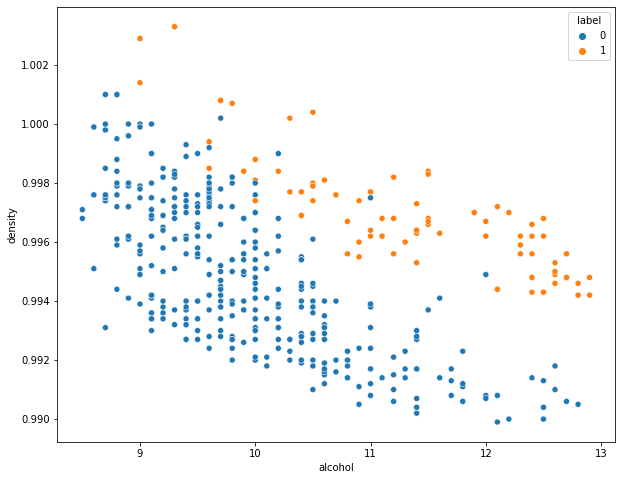

In [128]:
# visualisasi

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_wine, x='alcohol', y='density', hue='label')

plt.show()

feature alcohol dan density adalah features yang cukup baik unuk melakukan prediksi wine quality

## Data Splitting

In [129]:
X = df_wine[['alcohol', 'density']]
y = df_wine['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

## Model (without Polynomial)

In [130]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        84
           1       0.64      0.35      0.45        20

    accuracy                           0.84       104
   macro avg       0.75      0.65      0.68       104
weighted avg       0.82      0.84      0.82       104



In [131]:
f1_score(y_test, y_pred)

0.45161290322580644

## Model (Polynomial)


In [132]:
poly = PolynomialFeatures(degree=3, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [133]:
logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train)

y_pred = logreg.predict(X_test_poly)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        84
           1       1.00      0.65      0.79        20

    accuracy                           0.93       104
   macro avg       0.96      0.82      0.87       104
weighted avg       0.94      0.93      0.93       104



In [134]:
f1_score(y_test, y_pred)

0.787878787878788

**Kesimpulan**

- Data yang imbalance tidak harus dilakukan resampling.
- Feature yang baik mampu memprediksi data dengan baik, walaupun datanya imbalance.
- Usaha yang bisa dilakukan adalah dengan Feature Engineering seperti Polynomial Features
- Performa model meningkat setelah dilakukan Polynomial Features dari yang awalnya f1 score = 0.45 menjadi 0.78

# **Resampling**

Kita akan coba 4 skenario untuk handling imbalance dataset:
- No treatment
- Optimize threshold
- Random Undersampling
- Penalized

In [135]:
# !pip install imblearn

In [136]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

## Load Dataset

In [137]:
df_bank = pd.read_csv('bankloan.csv')
df_bank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [138]:
# rasio kelas 

df_bank['default'].value_counts() / len(df_bank)*100

0    73.857143
1    26.142857
Name: default, dtype: float64

In [139]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 49.3 KB


## Data Splitting

In [140]:
X = df_bank[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df_bank['default']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=0)

## 1. No Treatment

Model tanpa treatment apapun 

In [141]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       129
           1       0.80      0.43      0.56        46

    accuracy                           0.82       175
   macro avg       0.81      0.70      0.73       175
weighted avg       0.82      0.82      0.80       175



In [142]:
f1_score(y_test, y_pred)

0.5633802816901409

In [143]:
# model.predict_proba(X_test)[: , 1]

## 2. Optimize Threshold

Mencari threshold (batas probaibility yang memisahkan kelas 0 dan kelas 1) terbaik

In [144]:
model = LogisticRegression()
model.fit(X_train, y_train)

th_value = [i/100 for i in range(1,100)]

score_list = []

score = 0

# looping mencari nilai threshold terbaik
for i in th_value:

    # predict
    y_prob = model.predict_proba(X_test)[: , 1]
    y_pred = np.where(y_prob>i, 1, 0)

    score_temp = f1_score(y_test, y_pred)
    score_list.append(score_temp)

    if score_temp > score:
        score = score_temp

        best_score = score
        best_th = i

In [145]:
print('Best f1 score: ', best_score)
print('Best threshold: ', best_th)

Best f1 score:  0.6324786324786325
Best threshold:  0.23


<AxesSubplot:>

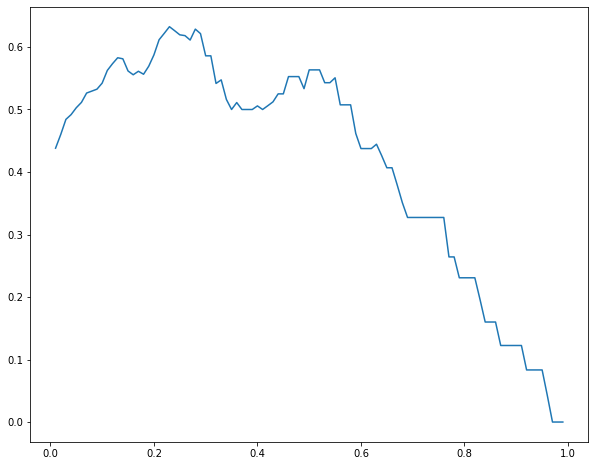

In [146]:
plt.figure(figsize=(10,8))
sns.lineplot(x=th_value, y=score_list)

In [147]:
# Predict dengan threshold terbaik

model = LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob> best_th , 1, 0)

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       129
           1       0.52      0.80      0.63        46

    accuracy                           0.75       175
   macro avg       0.72      0.77      0.72       175
weighted avg       0.81      0.75      0.77       175



Mengaur threshold dapat memperbaiki performa model pada data yang imbalance

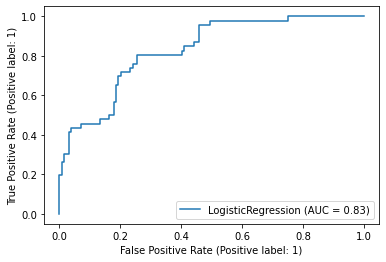

In [149]:
plot_roc_curve(model, X_test, y_test)

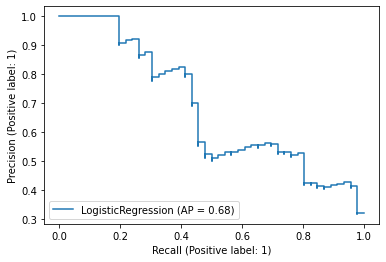

In [150]:
plot_precision_recall_curve(model, X_test, y_test)

Performa model setelah dicari threshold terbaiknya lebih baik dari pada model yang tanpa treatment
- No treatment: 0.56
- Best threshold: 0.63

## Undersampling

Mengurangi jumlah baris pada majority class

In [151]:
y_train.value_counts()

0    388
1    137
Name: default, dtype: int64

In [152]:
# resampler
rus = RandomUnderSampler()

# fit_resample
X_under, y_under = rus.fit_resample(X_train, y_train)

In [153]:
# fit dan predict model terhadap data yang sudah dilakukan resample

model_under = LogisticRegression()
model_under.fit(X_under, y_under)

y_pred = model_under.predict(X_test)
f1_score(y_test, y_pred)

0.6206896551724138

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       129
           1       0.51      0.78      0.62        46

    accuracy                           0.75       175
   macro avg       0.71      0.76      0.72       175
weighted avg       0.80      0.75      0.76       175



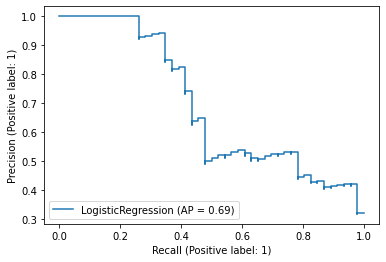

In [155]:
plot_precision_recall_curve(model_under, X_test, y_test)

Performa model setelah dilakukan resampling lebih baik dari pada model yang tanpa treatment
- No treatment: 0.56
- Resampling: 0.61

## Penalized

Model ML memberikan perhatian lebih kepada kelas minority

In [156]:
model_balance = LogisticRegression(class_weight='balanced')

model_balance.fit(X_train, y_train)

y_pred = model_balance.predict(X_test)

f1_score(y_test, y_pred)

0.6181818181818182

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       129
           1       0.53      0.74      0.62        46

    accuracy                           0.76       175
   macro avg       0.71      0.75      0.72       175
weighted avg       0.80      0.76      0.77       175



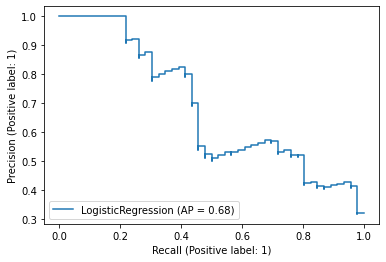

In [158]:
plot_precision_recall_curve(model_balance, X_test, y_test)

Performa model setelah dilakukan penalized (class_weight='balanced') pada model LogisticRegression lebih baik dari pada model yang tanpa treatment
- No treatment: 0.56
- Resampling: 0.61

## Rangkuman f1 score

1. No Treatment: 0.563
2. Optimize Threshold: 0.632
3. Undersampling: 0.612
4. Penalized: 0.618

F1 score terbaik adalah model dengan optimimized threshold

# **Cross Validation & Hyperparameter Tuning in Imbalace Dataset**

In [160]:
# Dataset masih menggunakan bankloan.csv

In [164]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.pipeline import Pipeline

### Cross Validation

In [166]:
# buat pipeline untuk tahap resampling dan modeling 
smote = SMOTE()
model = LogisticRegression()

# model_pipe akan digunakan untuk estimator di cross validation
model_pipe = Pipeline([
    ('resampler', smote),
    ('model', model)
])

# cross validation
model_cv = cross_val_score(
    estimator= model_pipe,
    X= X_train,
    y= y_train,
    cv=5,
    scoring='f1'
)

model_cv

array([0.65671642, 0.625     , 0.52777778, 0.67692308, 0.5915493 ])

In [167]:
print('f1 score mean: ', model_cv.mean())
print('f1 score std: ', model_cv.std())

f1 score mean:  0.6155933136771901
f1 score std:  0.05259395108061457


### Hyperparameter Tuning

In [168]:
# buat pipeline untuk tahap resampling dan modeling 
smote = SMOTE()
model = LogisticRegression()

# model_pipe akan digunakan untuk estimator di cross validation
model_pipe = Pipeline([
    ('resampler', smote),
    ('model', model)
])

In [173]:
# hyperparamspace
hyperparam_space = {
    'resampler__k_neighbors':[2,5,10,15,20],
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['liblinear', 'newton-cg']
}

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model_pipe,
    param_grid=hyperparam_space,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', SMOTE()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'model__solver': ['liblinear', 'newton-cg'],
                         'resampler__k_neighbors': [2, 5, 10, 15, 20]},
             scoring='f1')

In [175]:
print('Best f1 score: ', grid_search.best_score_)
print('Best param: ', grid_search.best_params_)

Best f1 score:  0.6304775154968757
Best param:  {'model__C': 10, 'model__solver': 'newton-cg', 'resampler__k_neighbors': 10}


In [177]:
# hasilnya ada 60 kombinasi hyperparameter
# tampilkan top 5 f1 score

pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__solver,param_resampler__k_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.132427,0.029205,0.025531,0.016798,10,newton-cg,10,"{'model__C': 10, 'model__solver': 'newton-cg',...",0.656716,0.666667,0.527778,0.709677,0.591549,0.630478,0.063771,1
15,0.169500,0.024663,0.016354,0.006858,10,newton-cg,2,"{'model__C': 10, 'model__solver': 'newton-cg',...",0.656716,0.625000,0.529412,0.718750,0.602740,0.626524,0.062315,2
20,0.071134,0.021805,0.010709,0.002219,1,liblinear,2,"{'model__C': 1, 'model__solver': 'liblinear', ...",0.656716,0.625000,0.537313,0.709677,0.602740,0.626289,0.057188,3
39,0.247193,0.033354,0.046941,0.028250,0.1,newton-cg,20,"{'model__C': 0.1, 'model__solver': 'newton-cg'...",0.656716,0.626866,0.547945,0.687500,0.602740,0.624353,0.047637,4
32,0.112714,0.039204,0.045453,0.037589,0.1,liblinear,10,"{'model__C': 0.1, 'model__solver': 'liblinear'...",0.656716,0.656716,0.527778,0.676923,0.602740,0.624175,0.054133,5


## Model Performance in Test Set

**Before hyperparameter tuning**

In [206]:
# buat pipeline untuk tahap resampling dan modeling 
smote = SMOTE(random_state=10)
model = LogisticRegression()

# model_pipe akan digunakan untuk estimator di cross validation
model_pipe = Pipeline([
    ('resampler', smote),
    ('model', model)
])

model_pipe.fit(X_train, y_train)

y_pred = model_pipe.predict(X_test)

f1_score(y_test, y_pred)

0.6055045871559633

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       129
           1       0.52      0.72      0.61        46

    accuracy                           0.75       175
   macro avg       0.70      0.74      0.71       175
weighted avg       0.79      0.75      0.76       175



**After hyperparameter tuning**

In [208]:
grid_search.best_estimator_

Pipeline(steps=[('resampler', SMOTE(k_neighbors=10)),
                ('model', LogisticRegression(C=10, solver='newton-cg'))])

In [209]:
model_final = grid_search.best_estimator_

model_final.fit(X_train, y_train)

y_pred = model_final.predict(X_test)

f1_score(y_test, y_pred)

0.6153846153846154

In [210]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       129
           1       0.55      0.70      0.62        46

    accuracy                           0.77       175
   macro avg       0.72      0.75      0.73       175
weighted avg       0.79      0.77      0.78       175



**Kesimpulan**

- Metode resampling bisa dimasukkan dalam pipeline
- Performa model meningkat tidak mengalami kenaikan setelah dilakukan hyperparameter tuning
    - before: 0.60
    - after: 0.61
- Kenaikan f1 score hanya kebetulan karena random_statenya